# Clustering
### Distance metrics
#### Context and Data

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# load data
data = np.loadtxt('venta_propiedades.txt', delimiter=',')
data[1:10,:]


array([[ 1.028309, 10.013562],
       [ 1.498665, 17.396522],
       [ 0.98841 , 23.138509],
       [ 1.04231 , 23.670459],
       [ 1.064285, 26.133856],
       [ 0.989924, 27.16672 ],
       [ 1.669657,  4.04883 ],
       [ 2.293296,  4.316585],
       [ 1.72207 ,  6.682627]])

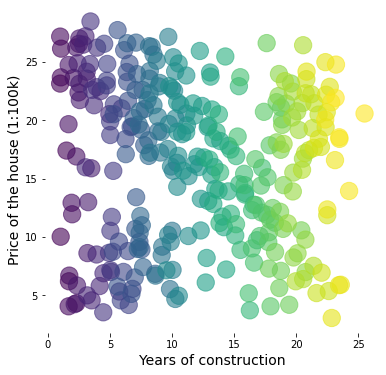

In [10]:
plt.figure(figsize=(6,6))
plt.scatter(data[:,0], data[:,1],
            c=np.linspace(0,1,data.shape[0]), s=300, alpha=0.6)
plt.xlabel('Years of construction', fontsize=14)
plt.ylabel('Price of the house (1:100k)', fontsize=14)
plt.box(False)
plt.show()



### DBSCAN

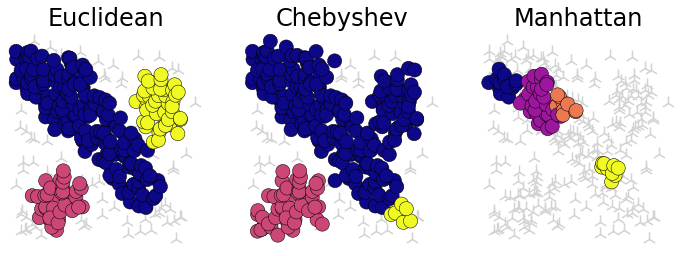

In [16]:
from sklearn.cluster import DBSCAN

# Data load
data = np.loadtxt('venta_propiedades.txt', delimiter=',')

# Identify clusters with differents distances
my_distances = ['euclidean', 'chebyshev', 'manhattan']

fig = plt.figure(figsize=(12,4))
plt.set_cmap('plasma')
for d in range(len(my_distances)):
    clusters = DBSCAN(2, min_samples=10,
                     metric=my_distances[d]).fit_predict(data)
    ax = fig.add_subplot(1,3, d+1)
    
    # point with noise
    ax.scatter(data[clusters == -1][:,0], data[clusters==-1][:,1],
              c='lightgray', s=200, marker='2')
    
    # points belong to clusters
    ax.scatter(data[clusters >= 0][:,0], data[clusters>=0][:,1],
              c=clusters[clusters>=0], s=200, linewidth=0.5, edgecolor='black')
    
    ax.set_title(my_distances[d].capitalize(), fontsize=24)
    ax.axis('off')

plt.show()
    
    


In [17]:
print(clusters)

[-1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0 -1 -1 -1 -1 -1 -1 -1 -1
 -1  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0  0 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1
  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1
 -1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  2  2 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  1  1  2  2  2 -1 -1 -1 -1 -1 -1 -1 -1  2  2  2 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  3  3 -1 -1 -1 -1 -1 -1
 -1 -1 -1  3  3  3 -1 -1 -1 -1 -1 -1 -1  3  3  3  3 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [18]:
print(data[clusters >= 0][:,0])

[ 0.98841   2.466798  2.071634  2.571818  2.534513  3.13085   2.391875
  3.121214  3.718454  4.241517  3.932924  3.571389  5.937112  4.741488
  4.743855  6.780006  6.665259  5.297339  6.449606  6.385299  7.76122
  7.505418  6.906231  7.806767  7.060473  7.628753  7.180168  8.093632
  8.88275   7.315035  7.405876  8.02965   8.185065  8.209363  9.059306
  9.139781  8.861293  8.506229  8.196     9.005745  8.933541  9.667753
  9.739877 10.281419 11.159593 10.815139 10.440584 11.202681 10.675413
 10.414638 11.139223 12.874988 11.787261 12.944146 16.455094 16.578201
 17.639792 17.22279  16.77886  17.809339 18.284414 17.904241 18.111261
 18.705703]


In [19]:
print(data[clusters>=0][:,1])

[23.138509 22.377591 23.62688  21.723563 23.120548 23.566369 24.881976
 24.157039 21.279387 22.491234 22.826782 22.605701 21.013161 22.979827
 23.388477 19.467955 19.409205 20.513798 21.663014 23.293124 17.863125
 19.189793 20.174093 20.968597 22.583569 22.588422 23.94666  18.274594
 19.043768 19.628004 20.761711 21.71912  23.560674 24.212005 17.226596
 18.998975 20.298937 21.283051 22.299993 23.191164 22.894537 17.532856
 19.672029 20.149888 20.574052 18.803841 19.011757 19.552694 21.319278
 21.561674 18.980978 19.407792 20.379971 19.545021 12.29151  12.761838
 11.893152 12.077559 12.718767 10.390911 11.215477 11.472024 12.473719
 12.153072]


In [20]:
print(clusters[clusters>=0])

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 1 1 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3]
